In [6]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

In [7]:
# Path to experiment results
EXPERIMENT_DIR = "/Users/mirayozcan/Desktop/vidur_copy/vidur/simulator_output/batch_size_experiment-feb12"

def load_experiment_data(exp_dir):
    results = []
    for batch_dir in os.listdir(exp_dir):
        if not batch_dir.startswith('batch_'):
            continue
            
        batch_size = int(batch_dir.split('_')[1])
        batch_path = os.path.join(exp_dir, batch_dir)
        
        # Get the most recent run
        run_dirs = [d for d in os.listdir(batch_path) if os.path.isdir(os.path.join(batch_path, d))]
        if not run_dirs:
            continue
        latest_run = sorted(run_dirs)[-1]
        run_path = os.path.join(batch_path, latest_run)
        
        # Load MFU data
        mfu_file = os.path.join(run_path, 'plots/replica_1_stage_1_mfu.json')
        if os.path.exists(mfu_file):
            with open(mfu_file, 'r') as f:
                mfu_data = json.load(f)
                avg_mfu = mfu_data.get('replica_1_stage_1_mfu_weighted_mean', 0)
        
        # Load memory usage data
        mem_file = os.path.join(run_path, 'plots/replica_1_memory_usage.json')
        if os.path.exists(mem_file):
            with open(mem_file, 'r') as f:
                mem_data = json.load(f)
                avg_mem = mem_data.get('replica_1_memory_usage_weighted_mean', 0)
        
        # Load energy analysis if available
        energy_file = os.path.join(run_path, 'analysis/simulation_stats_with_energy.json')
        if os.path.exists(energy_file):
            with open(energy_file, 'r') as f:
                energy_data = json.load(f)
        else:
            energy_data = {}
        
        results.append({
            'batch_size': batch_size,
            'avg_mfu': avg_mfu,
            'avg_memory': avg_mem,
            'total_energy': energy_data.get('total_energy_kwh', 0),
            'avg_power': energy_data.get('avg_power_watts', 0),
            'run_dir': run_path
        })
    
    return pd.DataFrame(results)

In [8]:
# Load and process data
df = load_experiment_data(EXPERIMENT_DIR)
df = df.sort_values('batch_size')
df.head()

,batch_size,avg_mfu,avg_memory,total_energy,avg_power,run_dir
2,1,0.578968,14.865773,214484.907067,2781.009758,/Users/mirayozcan/Desktop/vidur_copy/vidur/sim...
10,2,1.132139,29.547432,94013.317929,4744.318123,/Users/mirayozcan/Desktop/vidur_copy/vidur/sim...
14,3,1.679015,43.871734,60201.449399,6630.713691,/Users/mirayozcan/Desktop/vidur_copy/vidur/sim...
15,4,2.235892,57.787231,44788.573062,8415.757827,/Users/mirayozcan/Desktop/vidur_copy/vidur/sim...
9,5,2.836206,69.265888,37304.103130,9883.268352,/Users/mirayozcan/Desktop/vidur_copy/vidur/sim...


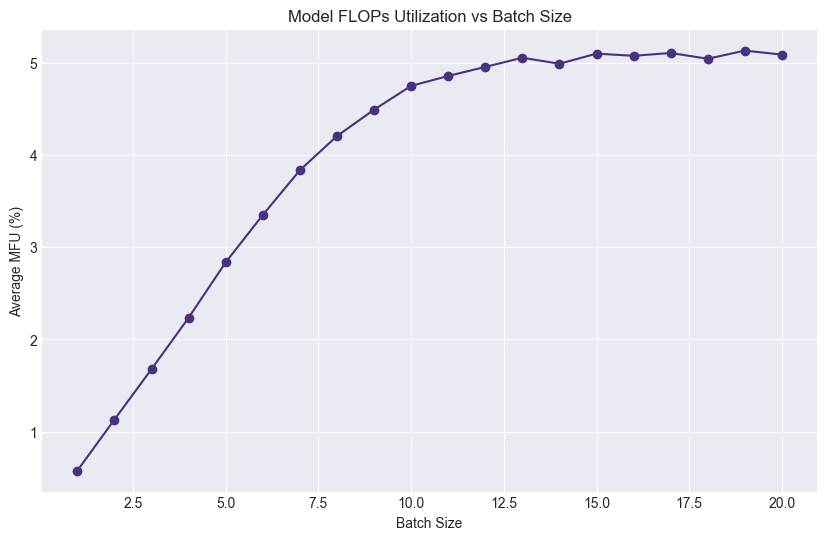

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['batch_size'], df['avg_mfu'], marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Average MFU (%)')
plt.title('Model FLOPs Utilization vs Batch Size')
plt.grid(True)
plt.show()

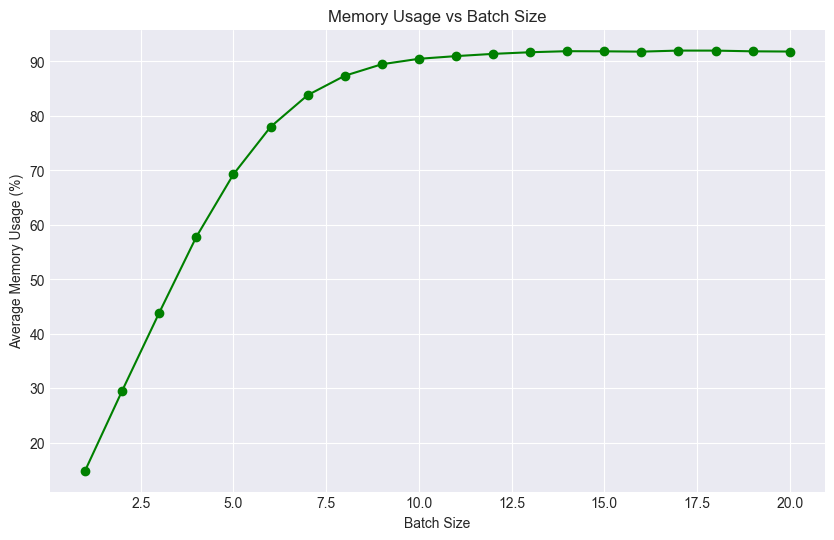

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['batch_size'], df['avg_memory'], marker='o', color='green')
plt.xlabel('Batch Size')
plt.ylabel('Average Memory Usage (%)')
plt.title('Memory Usage vs Batch Size')
plt.grid(True)
plt.show()

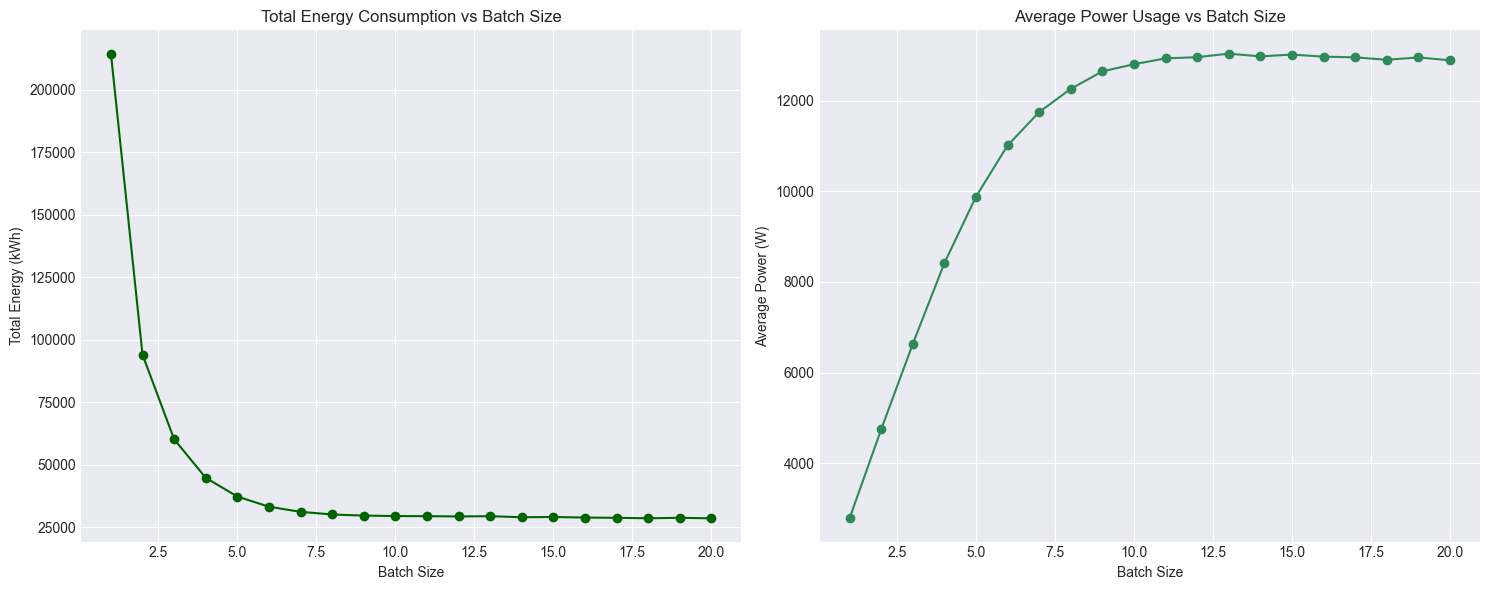

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(df['batch_size'], df['total_energy'], marker='o', color='darkgreen')
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Total Energy (kWh)')
ax1.set_title('Total Energy Consumption vs Batch Size')
ax1.grid(True)

ax2.plot(df['batch_size'], df['avg_power'], marker='o', color='seagreen')
ax2.set_xlabel('Batch Size')
ax2.set_ylabel('Average Power (W)')
ax2.set_title('Average Power Usage vs Batch Size')
ax2.grid(True)

plt.tight_layout()
plt.show()

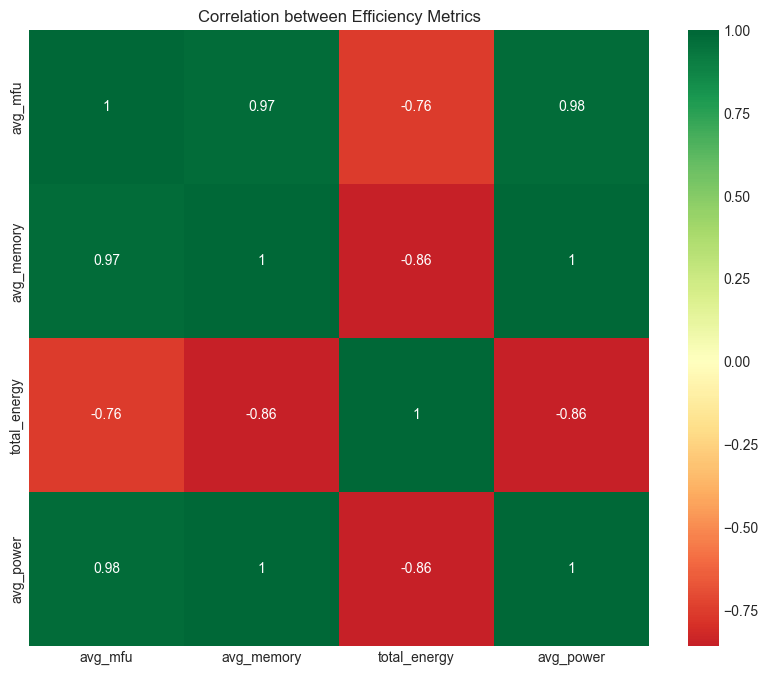

In [12]:
correlation_matrix = df[['avg_mfu', 'avg_memory', 'total_energy', 'avg_power']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation between Efficiency Metrics')
plt.show()